In [1]:
import os,sys,inspect
currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parentdir = os.path.dirname(currentdir)
sys.path.insert(0,parentdir)

In [2]:
# for autoreload modules
%load_ext autoreload
%autoreload 2

In [3]:
from collections import Counter
import pandas as pd
import numpy as np
pd.set_option('display.max_colwidth', 100)
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 500)

In [4]:
from statistic import Statistic

In [5]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

In [6]:
path_file = '/mnt/files/workdata/work/merchants/merchant_33_kyw3_2020-06-05/04_experiments/' 

In [24]:
db_teach = pd.read_csv(path_file + 'ex_01_some_teach/db_teach_2_digit_status_kyw3_from_2019-11-20_to_2020-03-13.csv', encoding='cp1251')
db_test = pd.read_csv(path_file + 'ex_01_some_teach/db_test_2_digit_status_kyw3a_from_2020-04-06_to_2020-05-06.csv', encoding='cp1251')

In [25]:
teach = pd.read_csv(path_file + 'ex_02_jupyter/teach_2019-11-20_2020-03-13.csv', dtype=str)

In [26]:
db_teach.head()

,amount,amount_deviation,bank_currency,bin,city,count_months_to_end_card,day_of_week,gender2,hour,id,is_city_resolved,is_gender_undefined,latitude,longitude,order_id,phone_2_norm,status
0,1.00,-3,112,547087,Stuttgart,29,3,undefined,9,547087******1680_2022-04,1,1,48.7667,9.1833,49219577955111383,55,0
1,25.00,-2,840,517148,Kapaa,41,3,f,12,517148******7320_2023-04,1,0,22.0837,-159.3553,49221760925063337,8,0
2,21.18,-2,840,546540,undefined,44,3,m,15,546540******9404_2023-07,0,0,38.0000,-97.0000,49224688788195598,40,0
3,200.00,2,840,510805,Oakland,40,3,m,15,510805******1186_2023-03,1,0,37.8116,-122.2420,49224696921328680,10,0
4,2.38,-3,76,544731,Rio De Janeiro,80,3,undefined,15,544731******7316_2026-07,1,1,-22.9000,-43.2333,49224839756465248,19,0


In [27]:
teach.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 434314 entries, 0 to 434313
Data columns (total 22 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   order_id           434314 non-null  object
 1   status             434314 non-null  object
 2   date               434314 non-null  object
 3   processed          434314 non-null  object
 4   amount             434314 non-null  object
 5   currency           434314 non-null  object
 6   card_holder        434314 non-null  object
 7   email              434314 non-null  object
 8   phone              434314 non-null  object
 9   address            434314 non-null  object
 10  city_from_order    434314 non-null  object
 11  country            434314 non-null  object
 12  zip                434314 non-null  object
 13  ip                 434314 non-null  object
 14  project_id         434314 non-null  object
 15  reported           7236 non-null    object
 16  status_chargeback  4

In [28]:
db_teach.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 433425 entries, 0 to 433424
Data columns (total 17 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   amount                    433425 non-null  float64
 1   amount_deviation          433425 non-null  int64  
 2   bank_currency             433425 non-null  int64  
 3   bin                       433425 non-null  int64  
 4   city                      433425 non-null  object 
 5   count_months_to_end_card  433425 non-null  int64  
 6   day_of_week               433425 non-null  int64  
 7   gender2                   433425 non-null  object 
 8   hour                      433425 non-null  int64  
 9   id                        433425 non-null  object 
 10  is_city_resolved          433425 non-null  int64  
 11  is_gender_undefined       433425 non-null  int64  
 12  latitude                  433425 non-null  object 
 13  longitude                 433425 non-null  o

In [29]:
teach.describe()

,order_id,status,date,processed,amount,currency,card_holder,email,phone,address,city_from_order,country,zip,ip,project_id,reported,status_chargeback,date_cb_only,card_masked,card_expire,date_only,id
count,434314,434314,434314,434314,434314,434314,434314,434314,434314,434314,434314,434314,434314,434314,434314,7236,434314,434314,434314,434314,434314,434314
unique,434314,2,418231,413341,5808,3,89599,95433,93878,94508,10629,15,20276,161139,4,42,4,144,89807,125,138,103538
top,51624733976312523,false,2020-02-03 01:07:17,2020-01-20 23:00:40,26.48,USD,Chase Prater,590215680119@4null.com,2143927194,3816 Walden Dr,Chicago,USA,93561,216.238.251.46,9ffa75299b6caaa89457fb07db86f47f8fb8198a,2020-01-10,charged,2020-01-04,552486******3331,2023-11,2020-01-04,552486******3331_2024-06
freq,1,427803,6,23,63294,416471,437,351,437,437,5174,408013,564,281,122882,826,418510,10656,437,15239,10804,437


In [30]:
db_teach.describe()

,amount,amount_deviation,bank_currency,bin,count_months_to_end_card,day_of_week,hour,is_city_resolved,is_gender_undefined,order_id,phone_2_norm,status
count,433425.000000,433425.000000,433425.000000,433425.000000,433425.000000,433425.000000,433425.000000,433425.000000,433425.000000,4.334250e+05,433425.000000,433425.000000
mean,86.075152,-0.562033,795.396403,530239.896713,34.515619,4.357619,10.202303,0.608970,0.429638,5.049484e+16,30.409672,0.014445
std,155.484229,2.218619,168.955127,14389.453792,15.491596,2.046192,7.950285,0.487982,0.495025,6.492802e+14,25.564432,0.119318
min,1.000000,-3.000000,4.000000,510004.000000,0.000000,1.000000,0.000000,0.000000,0.000000,4.921958e+16,0.000000,0.000000
25%,26.480000,-2.000000,840.000000,517805.000000,25.000000,3.000000,3.000000,0.000000,0.000000,5.000376e+16,10.000000,0.000000
50%,31.890000,-2.000000,840.000000,527520.000000,36.000000,5.000000,7.000000,1.000000,0.000000,5.040756e+16,19.000000,0.000000
75%,80.540000,0.000000,840.000000,542432.000000,45.000000,6.000000,19.000000,1.000000,1.000000,5.100695e+16,50.000000,0.000000
max,1500.000000,8.000000,862.000000,559998.000000,880.000000,7.000000,23.000000,1.000000,1.000000,5.173217e+16,99.000000,1.000000


In [31]:
db_teach.bin = db_teach.bin.apply(lambda x: round(x/1000))
db_teach.bin = db_teach.bin.astype(np.int)

In [32]:
db_teach.longitude = db_teach.longitude.apply(lambda x: -97 if x == 'undefined' else x)
db_teach.latitude = db_teach.latitude.apply(lambda x: 38 if x == 'undefined' else x)

In [33]:
db_teach.city,_city = pd.factorize(db_teach.city) 
db_teach.gender2,_gender2 = pd.factorize(db_teach.gender2) 

In [34]:
num_cols_int = ['city', 'gender2']
db_teach[num_cols_int] = db_teach[num_cols_int].astype(np.int)

In [35]:
num_cols_float = ['latitude', 'longitude']
db_teach[num_cols_float] = db_teach[num_cols_float].astype(np.float)

In [36]:
db_teach.drop(['id', 'order_id'], axis=1, inplace=True)

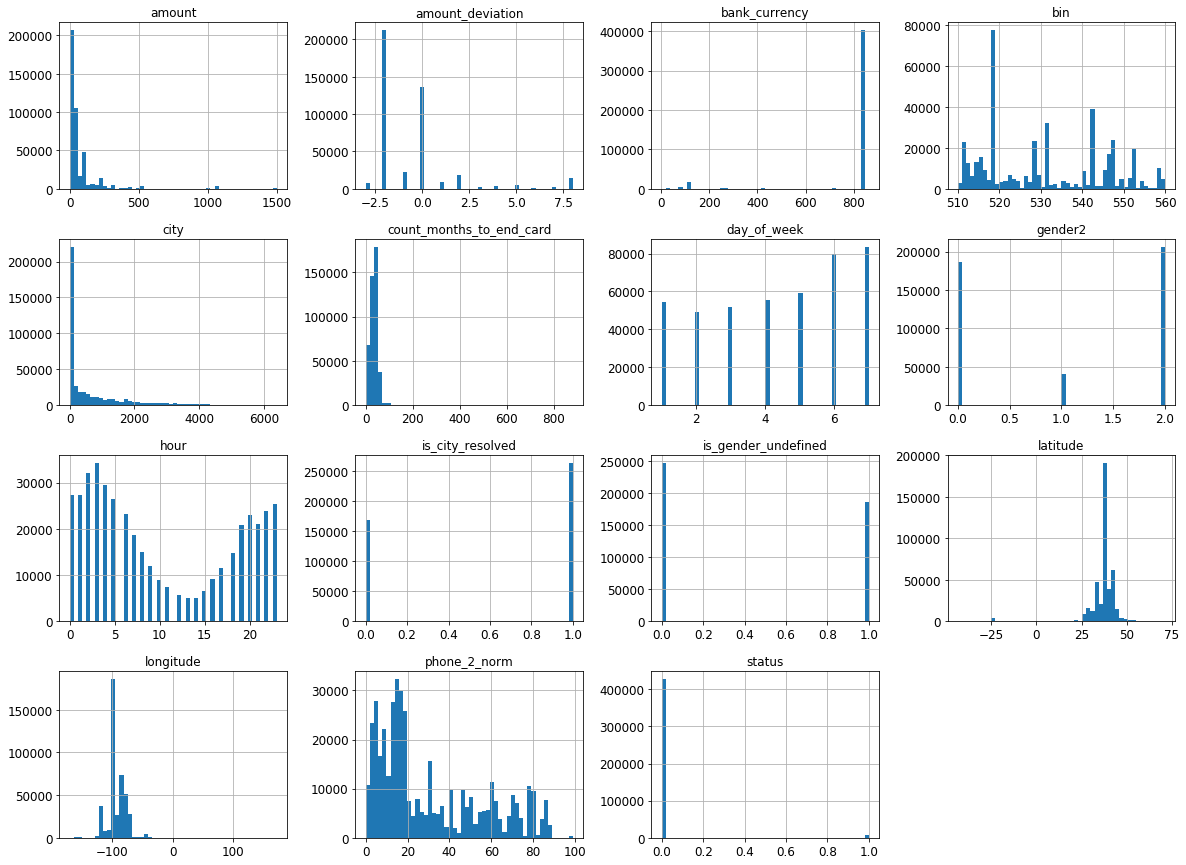

In [37]:
%matplotlib inline
import matplotlib.pyplot as plt
db_teach.hist(bins=50, figsize=(20,15))
# save_fig("attribute_histogram_plots")
plt.show()

In [39]:
mask = db_teach.status == 1
df_bad_status = db_teach[mask]

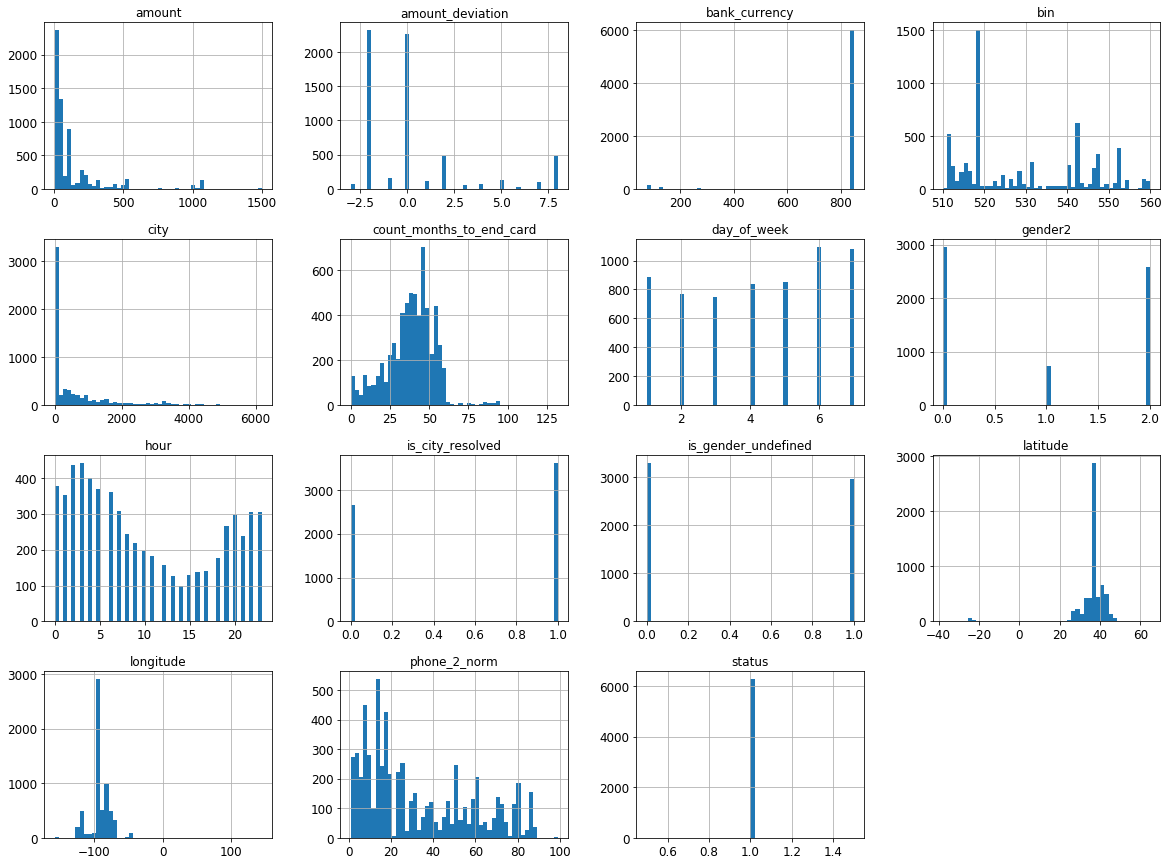

In [40]:
%matplotlib inline
import matplotlib.pyplot as plt
df_bad_status.hist(bins=50, figsize=(20,15))
# save_fig("attribute_histogram_plots")
plt.show()

In [43]:
# The defferent values from tables in teach and test

In [41]:
st_db_teach = Statistic.get_spreadsheet_table(db_teach, index_name='amount_deviation', col_names='hour', fun_values=np.mean)
st_db_teach_100 = round(st_db_teach*100, 3)
st_db_teach_100

hour,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
amount_deviation,,,,,,,,,,,,,,,,,,,,,,,,
-3,0.344,1.512,1.104,1.627,1.518,0.541,1.210,0.621,0.000,1.149,0.000,0.000,0.781,0.000,0.658,0.369,0.316,0.316,0.538,0.437,0.808,0.722,0.705,0.815
-2,1.085,0.965,1.027,0.803,1.096,1.032,1.130,1.296,1.063,1.484,1.769,1.940,2.153,2.320,2.000,2.038,1.164,0.756,0.824,0.960,0.899,0.803,0.926,0.769
-1,0.460,0.471,0.540,0.688,0.616,0.514,1.013,0.697,0.579,0.453,0.612,1.119,0.669,1.439,0.702,2.047,0.971,0.797,0.640,0.959,1.019,0.721,0.768,1.038
0,1.566,1.482,1.545,1.617,1.540,1.733,1.788,1.945,2.024,2.256,2.612,3.525,3.348,2.722,1.900,1.555,1.391,1.150,1.339,1.572,1.425,1.369,1.550,1.309
1,1.213,1.107,1.343,1.781,1.029,1.193,2.227,0.662,2.713,1.932,2.564,2.804,2.174,0.000,0.000,0.917,1.408,1.569,1.980,0.935,1.461,0.962,0.811,1.515
2,2.224,2.526,2.271,2.234,1.663,2.797,3.292,3.342,3.140,3.226,4.798,2.564,5.076,4.545,3.933,2.273,3.438,2.278,1.420,2.154,3.455,2.215,1.335,1.811
3,0.602,1.274,1.538,3.333,0.610,2.158,4.587,2.299,3.371,0.000,0.000,0.000,2.941,4.348,0.000,0.000,8.571,5.882,4.545,5.607,0.870,1.653,1.587,3.472
4,1.544,1.859,1.901,2.121,2.335,2.186,1.220,1.653,1.527,3.704,4.918,0.000,10.000,0.000,3.571,2.000,3.659,1.087,2.970,1.657,1.775,1.170,1.951,3.419
5,4.207,1.282,3.209,1.928,3.107,1.007,2.000,5.023,5.405,2.419,3.846,2.410,10.204,6.452,6.250,2.941,5.063,1.626,2.920,2.252,2.857,2.066,2.574,1.413


In [42]:
st_db_test = Statistic.get_spreadsheet_table(db_test, index_name='amount_deviation', col_names='hour', fun_values=np.mean)
st_db_test_100 = round(st_db_test*100, 3)
st_db_test_100

hour,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
amount_deviation,,,,,,,,,,,,,,,,,,,,,,,,
-3,0.000,0.000,0.000,3.030,0.000,0.000,0.000,7.143,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,5.000,0.000,0.000,0.000,0.000,0.000,0.000
-2,0.588,0.299,0.289,0.847,1.106,0.805,0.407,1.426,1.201,0.403,0.482,2.013,0.833,0.677,0.909,0.489,0.633,0.763,0.407,0.484,0.783,0.638,0.905,0.430
-1,0.000,0.000,0.448,0.463,0.000,0.877,0.000,0.694,0.000,0.000,1.562,2.439,0.000,0.000,0.000,0.000,1.235,0.000,0.000,0.549,0.000,0.000,0.000,0.000
0,1.383,1.432,1.029,1.254,1.815,1.224,1.663,1.615,2.022,1.139,1.392,2.915,2.367,3.012,1.269,1.457,1.252,1.192,1.012,1.182,1.414,1.681,1.967,1.610
1,0.855,1.905,1.770,1.075,2.128,1.429,1.370,8.197,3.636,0.000,0.000,0.000,6.897,8.333,0.000,0.000,2.326,2.000,0.000,0.000,3.390,1.282,2.469,0.000
2,2.203,0.442,1.852,2.367,3.125,1.899,4.430,5.298,5.714,3.125,4.615,4.545,2.381,3.226,2.500,7.143,1.942,1.754,1.408,2.344,3.175,2.825,3.431,2.717
3,0.000,4.762,0.000,0.000,0.000,0.000,0.000,5.263,0.000,0.000,0.000,0.000,0.000,0.000,9.091,0.000,0.000,0.000,0.000,0.000,10.000,0.000,0.000,0.000
4,0.000,0.000,12.903,9.375,3.704,0.000,5.000,0.000,6.250,8.333,14.286,0.000,0.000,0.000,0.000,6.667,11.111,0.000,4.348,12.500,6.250,8.696,3.226,5.263
5,1.639,4.545,1.389,4.348,1.852,5.556,0.000,3.846,7.692,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,3.704,0.000,0.000,2.857,5.556,0.000,0.000


In [114]:
mask = (db_teach.amount_deviation == 7) & (db_teach.hour == 11)
st_amount_d = db_teach[mask]
st_amount_d[['amount', 'status']].head(100)
Statistic.get_stat_summarise_by_column(st_amount_d, 'hour')

,n,amount_total,n_bad,amount_bad,cb_rate,cb_rate_amount,true_amount_weight,false_amount_weight,true_weight,false_weight,p,p_a
hour,,,,,,,,,,,,
11,37,15607.87,6,2544.84,16.2162,16.3049,1.0,1.0,1.0,1.0,0.5,0.5
